# Data Understanding: Exploratory Data Anaylsis

### Import Relevant Libraries and Import Dataset

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [240]:
df = pd.read_csv('Terry_Cleaned.csv')
df.head()

,Unnamed: 0,Subject Age Group,Stop Resolution,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Officer Squad,Weapon,Call Made,Arrest Made,Frisk,Year Reported
0,0,26 - 35,Arrest,1984,M,Black or African American,Asian,Male,SOUTH PCT 1ST W - ROBERT,0,0,0,0,2015
1,1,26 - 35,Field Contact,1965,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
2,2,26 - 35,Field Contact,1961,M,White,White,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
3,3,26 - 35,Field Contact,1963,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
4,4,26 - 35,Field Contact,1977,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015


In [241]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Subject Age Group,Stop Resolution,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Officer Squad,Weapon,Call Made,Arrest Made,Frisk,Year Reported
0,26 - 35,Arrest,1984,M,Black or African American,Asian,Male,SOUTH PCT 1ST W - ROBERT,0,0,0,0,2015
1,26 - 35,Field Contact,1965,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
2,26 - 35,Field Contact,1961,M,White,White,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
3,26 - 35,Field Contact,1963,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
4,26 - 35,Field Contact,1977,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015


### EDA

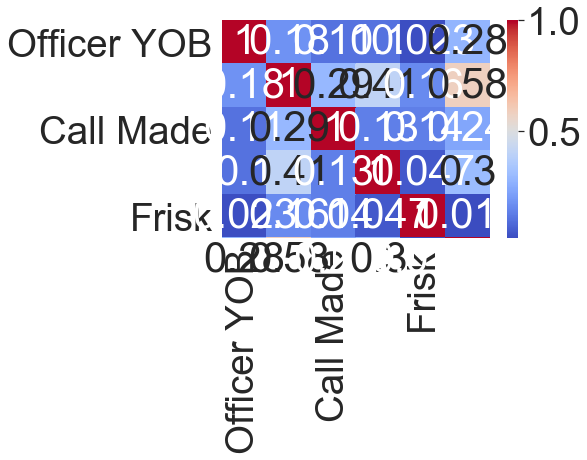

In [242]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')  #Heatmap with Correlations overlaid on features.

# Scale the Heat Map, so the correlation values are centered and ledgeable
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

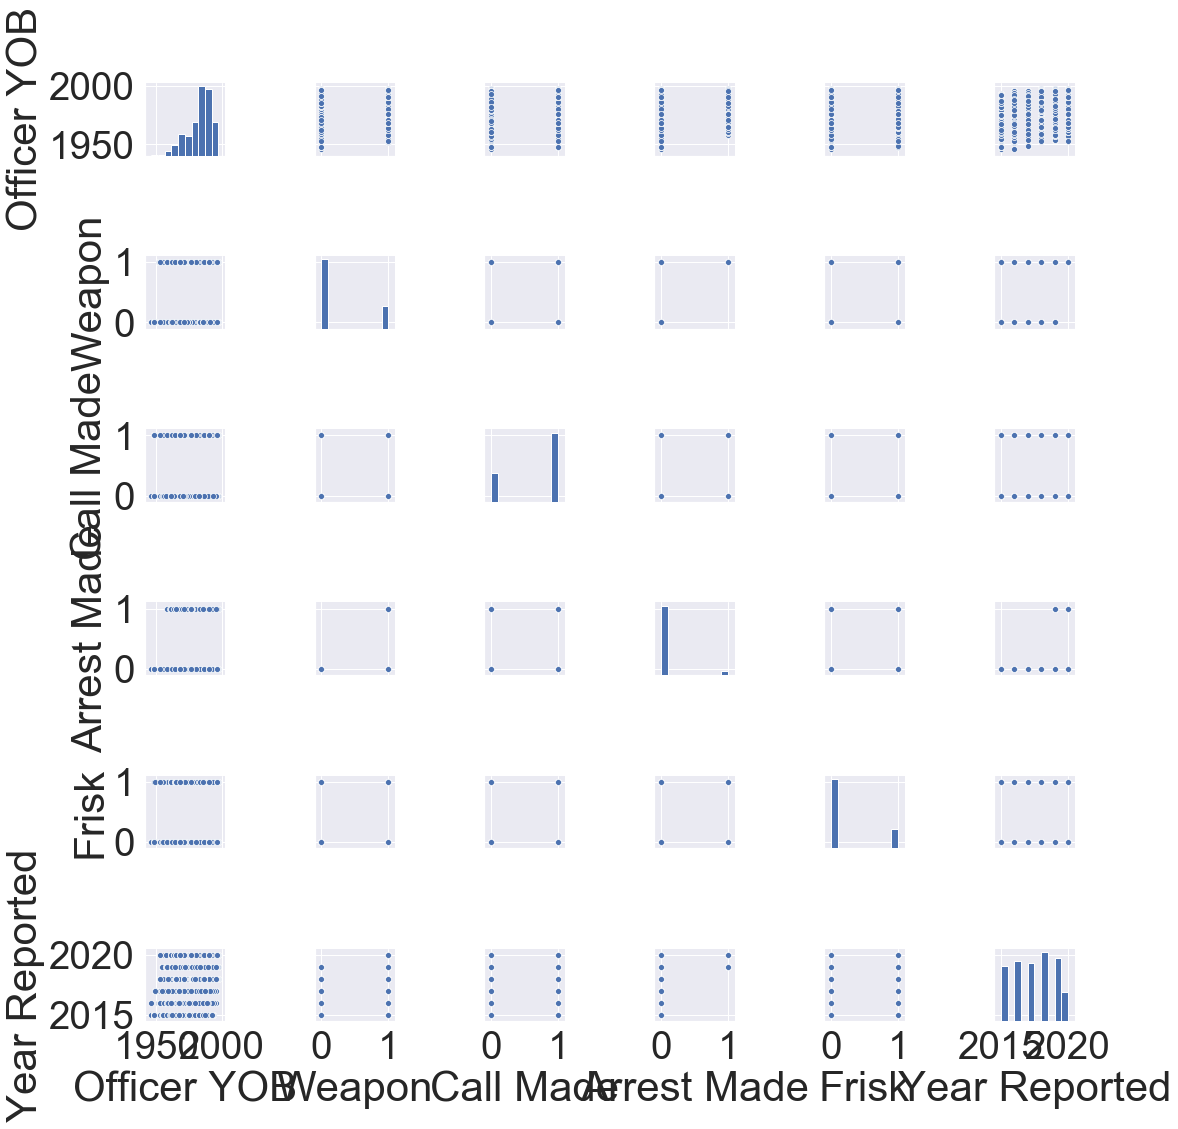

In [243]:
sns.pairplot(df)

In [244]:
# Find arrests made by white cops on minorities born before the 80's, born after the 80's
# How many arrest were made by minorities on minorities?
# Were there weapons found, but no arrests made? What race was the subject, what were the circumtances?
# which squad had the most arrests of black people?
# how many arrests resulted from Calls Made?
# how many frisks with no weapons found? How many frisks lead to arrest?

# Does community policing empower racists and the racially baised to call and report false crimes? (revist call types and source from orginal df copy) 

In [245]:
#Do a subplot (hist or bar) gender vs race in subject and officer calls and arrests
# suspicous person calls on suspects by gender and race

In [246]:
# On average how many white cops stop black people when 
# no calls are made. Is it race or age?
df.loc[(df['Officer Race'] == 'White') & (df['Subject Perceived Race'] == 'Black or African American')]

,Subject Age Group,Stop Resolution,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Officer Squad,Weapon,Call Made,Arrest Made,Frisk,Year Reported
4,26 - 35,Field Contact,1977,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
5,26 - 35,Field Contact,1973,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
16,26 - 35,Field Contact,1959,M,White,Black or African American,Male,WEST PCT 2ND W - MARY BEATS,0,0,0,1,2015
42,26 - 35,Field Contact,1986,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
45,26 - 35,Field Contact,1986,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43045,56 and Above,Field Contact,1996,M,White,Black or African American,Male,NORTH PCT 3RD W - B/N RELIEF,1,1,0,0,2020
43055,56 and Above,Field Contact,1976,F,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,1,1,0,1,2020
43056,56 and Above,Field Contact,1968,M,White,Black or African American,Male,NORTH PCT 2ND W - NORA,1,1,0,0,2020
43058,56 and Above,Offense Report,1992,M,White,Black or African American,Male,WEST PCT 3RD W - KING,1,1,0,0,2020


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

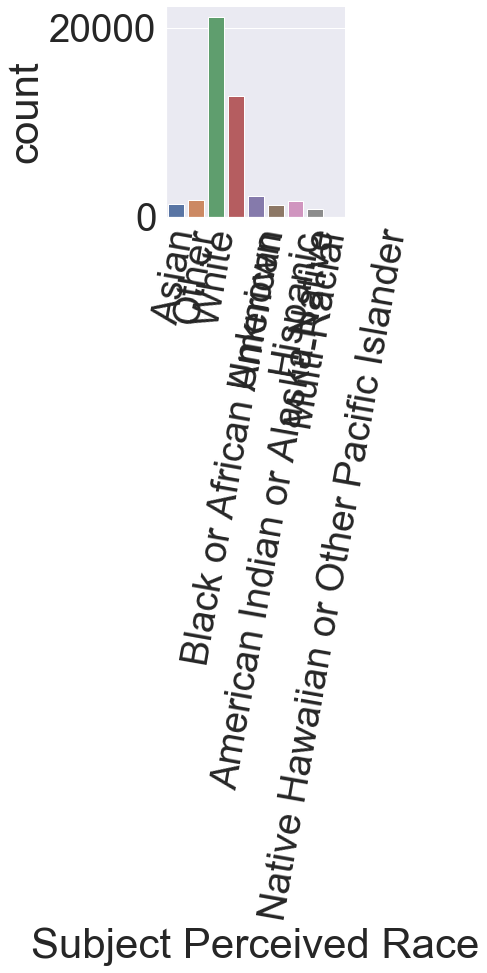

In [247]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Subject Perceived Race', kind='count', data=df)
plt.xticks(rotation=80)


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

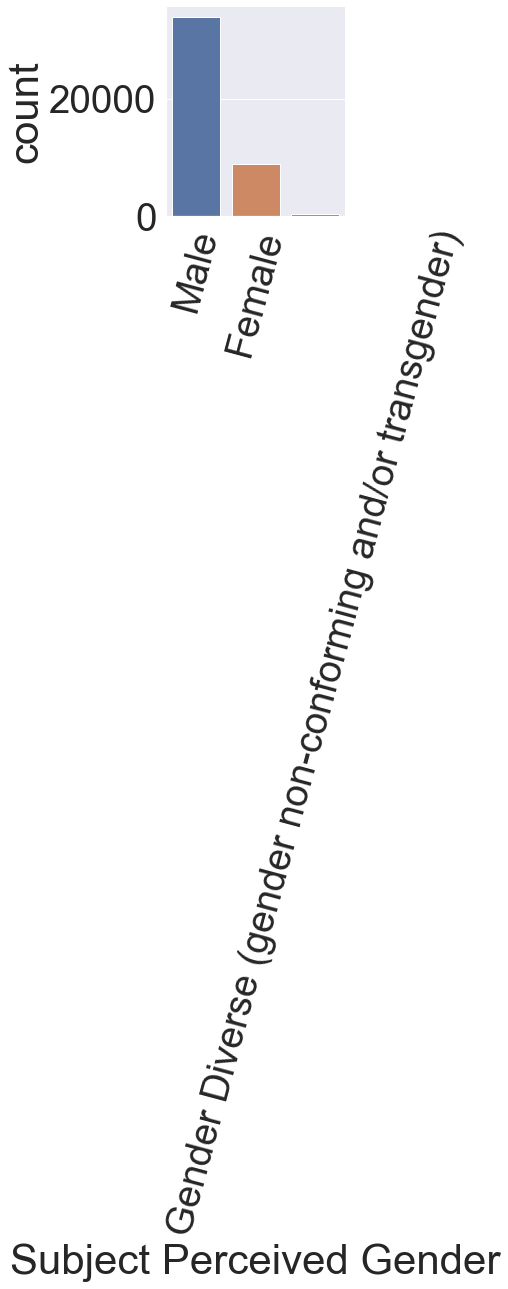

In [248]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Subject Perceived Gender', kind='count', data=df)
plt.xticks(rotation=75)


In [249]:
# Does age play a part in racism or bias? 
# Is it race or age?

df.groupby(['Officer YOB', 'Officer Race', 'Subject Perceived Race']).median().head()

Weapon  Call Made  \
Officer YOB Officer Race Subject Perceived Race                         
1946        Asian        Black or African American     0.0        0.0   
                         White                         0.0        0.0   
1948        White        Asian                         0.0        1.0   
                         Black or African American     0.0        0.0   
                         Hispanic                      0.0        1.0   

                                                    Arrest Made  Frisk  \
Officer YOB Officer Race Subject Perceived Race                          
1946        Asian        Black or African American          0.0    0.0   
                         White                              0.0    0.0   
1948        White        Asian                              0.0    0.0   
                         Black or African American          0.0    0.0   
                         Hispanic                           0.0    1.0   

                                                    Year Reported  
Officer YOB Officer Race Subject Perceived Race                    
1946        Asian        Black or African American         2016.0  
                         White                             2015.0  
1948        White        Asian                             2015.0  
                         Black or African American         2015.0  
                         Hispanic                          2015.0

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

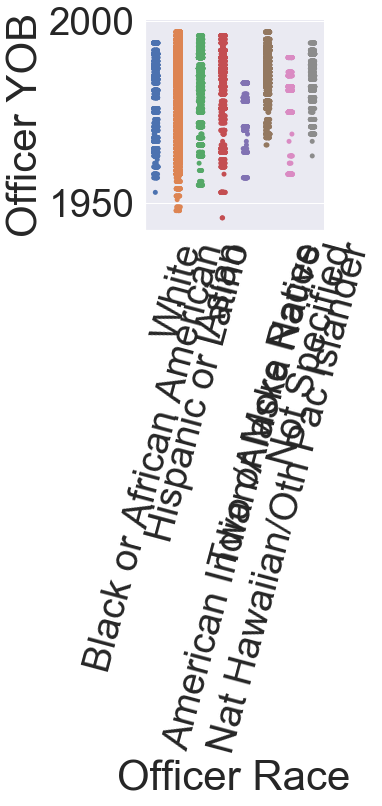

In [250]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(y='Officer YOB', x='Officer Race', data=df)
plt.xticks(rotation=75)


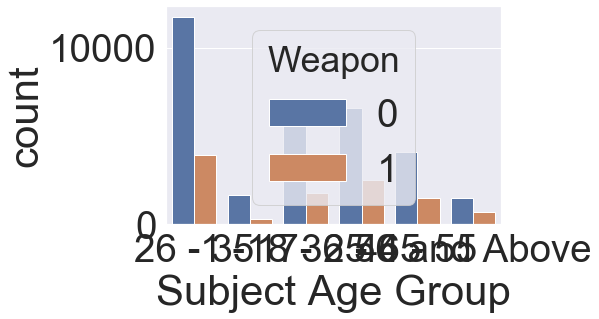

In [251]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.countplot(x='Subject Age Group', hue= 'Weapon', data=df)

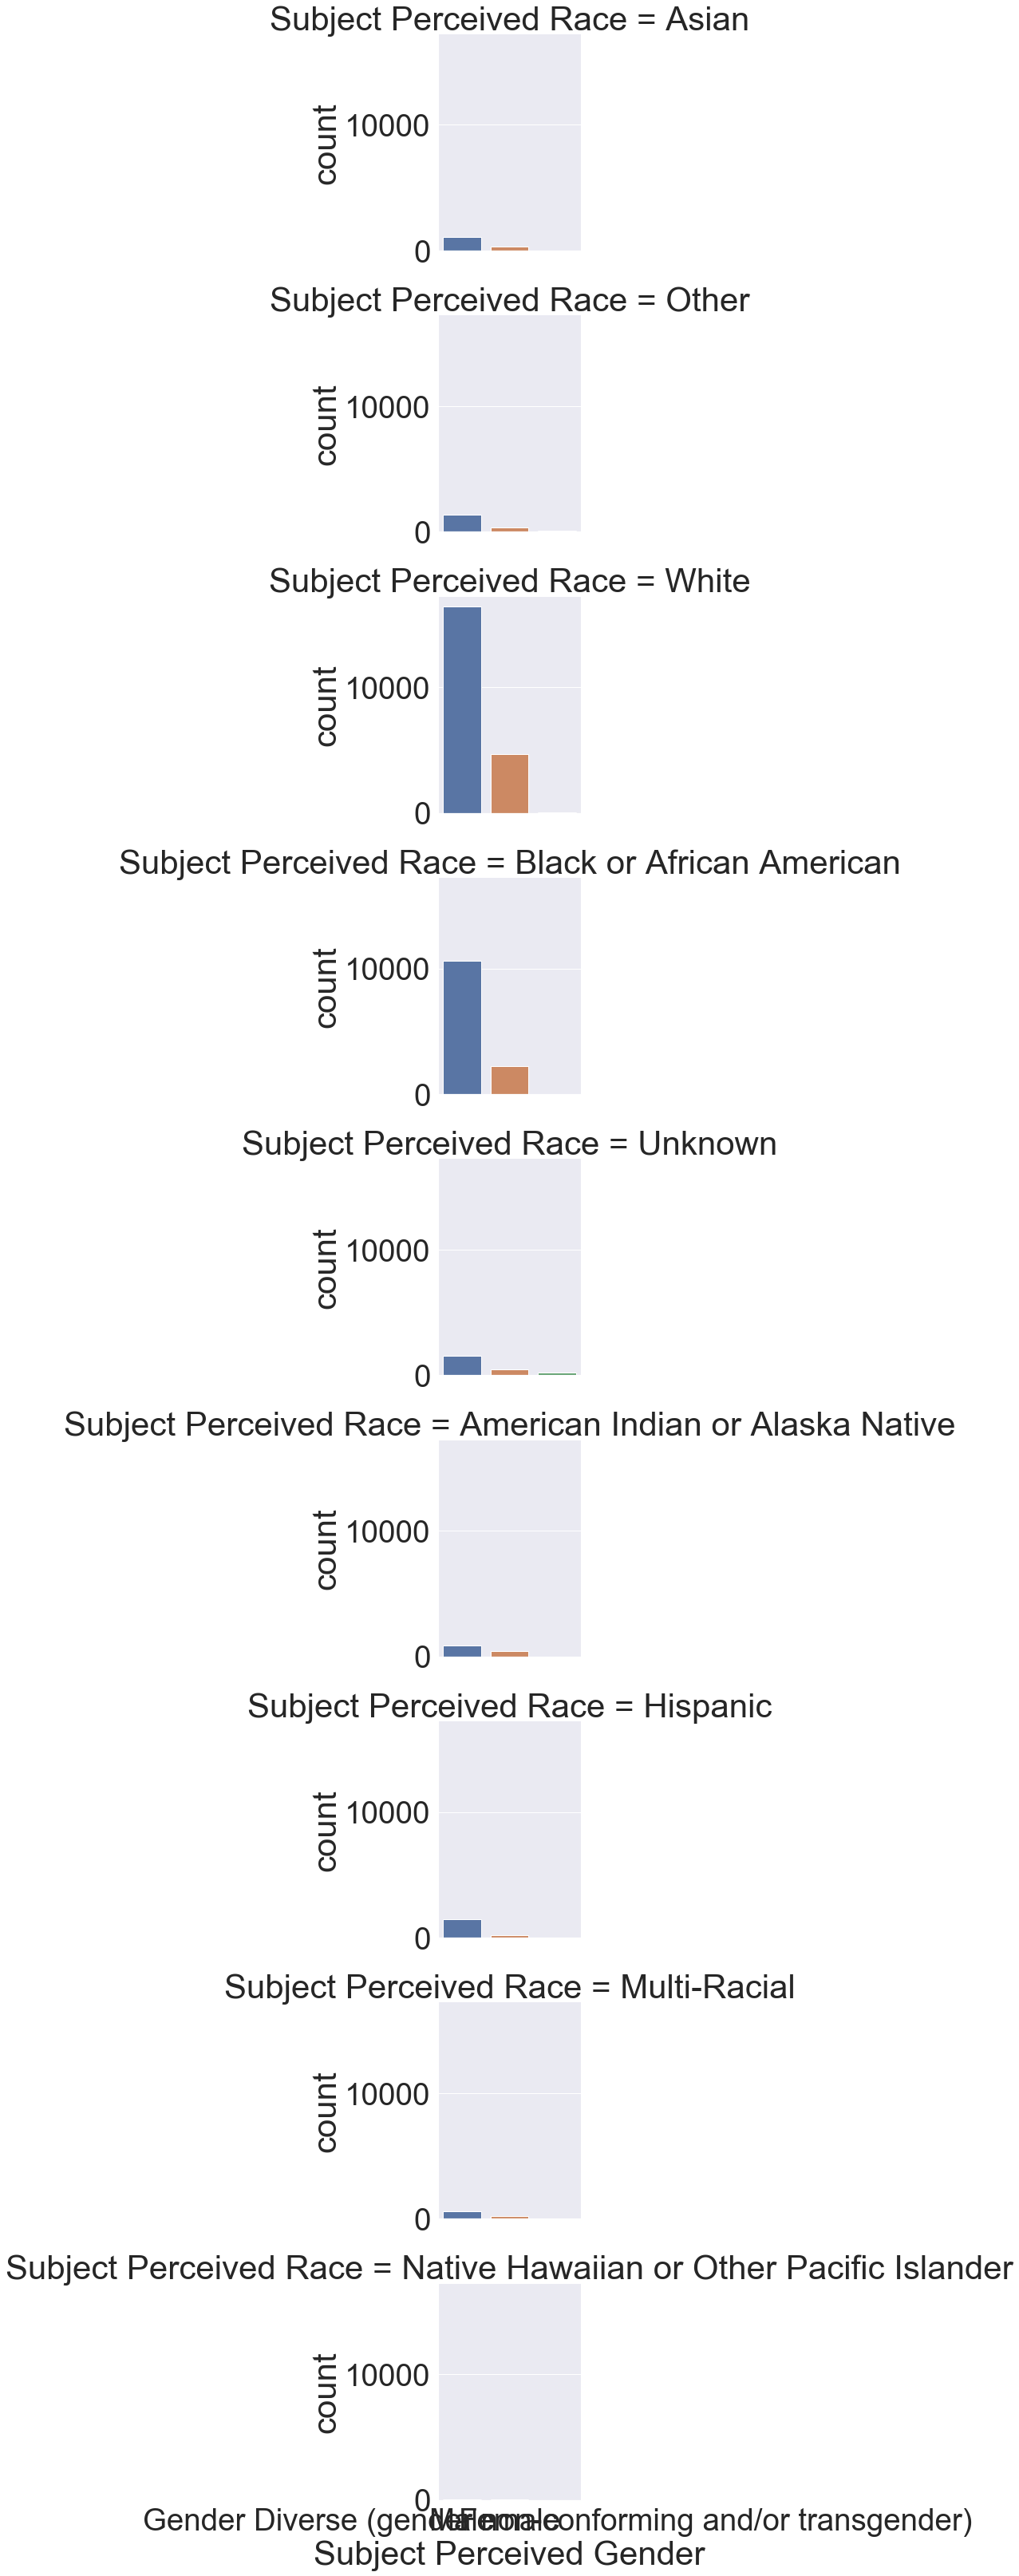

In [253]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot("Subject Perceived Gender", col='Subject Perceived Race', col_wrap=1,
                data=df,
                kind="count")


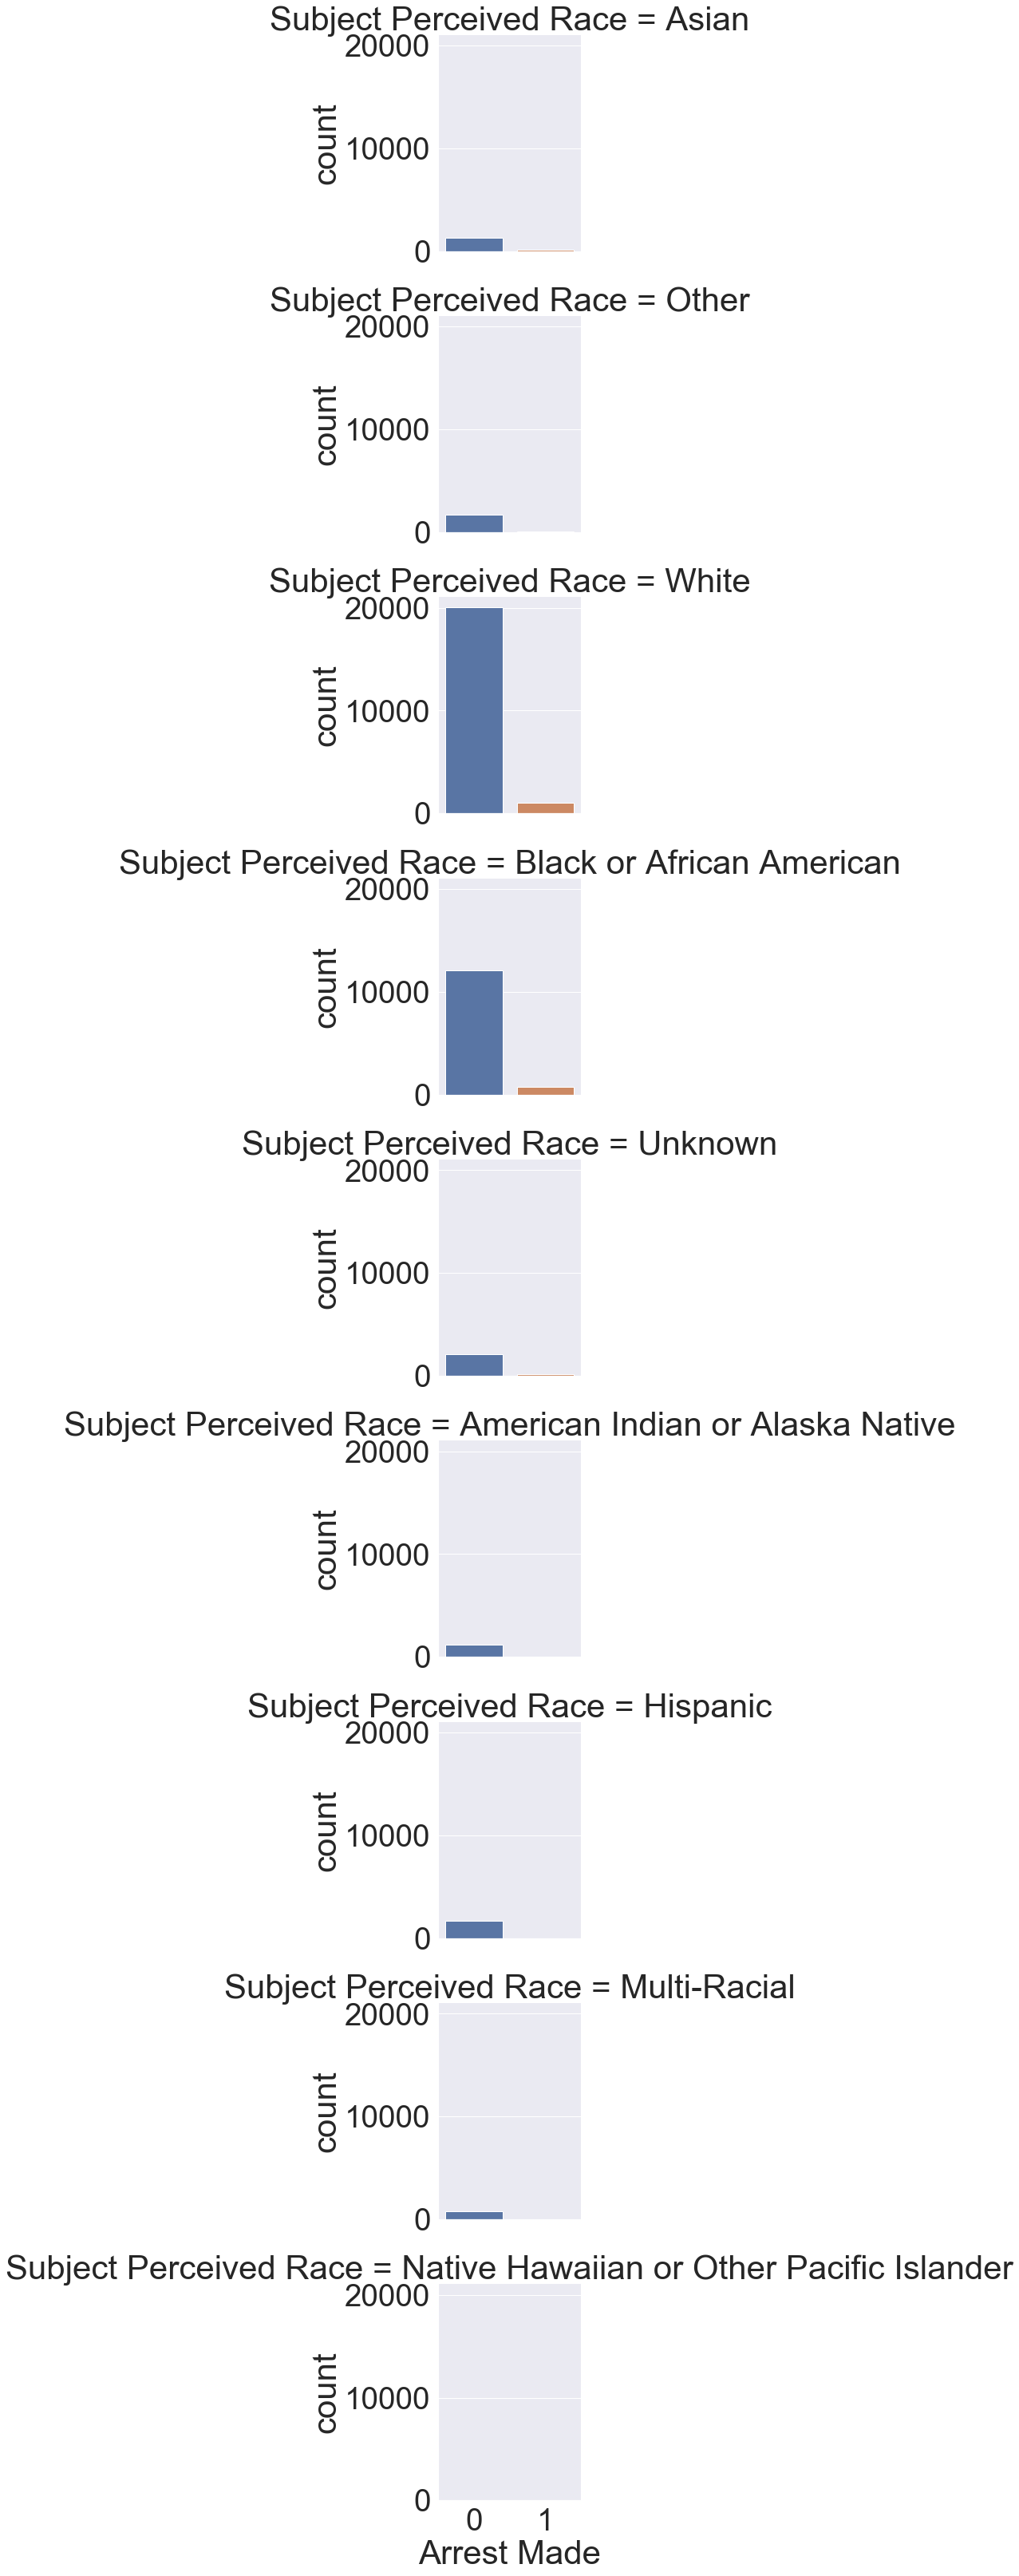

In [254]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot("Arrest Made", col='Subject Perceived Race', col_wrap=1,
                data=df,
                kind="count")



(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

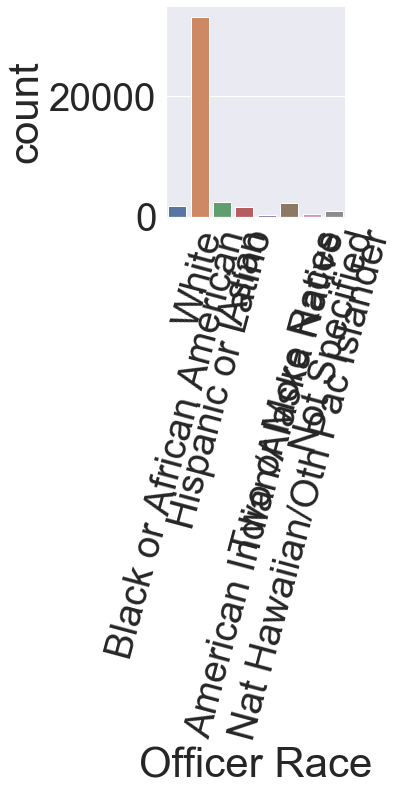

In [255]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Officer Race', kind='count', data=df)
plt.xticks(rotation=75)


<Figure size 1440x1224 with 0 Axes>

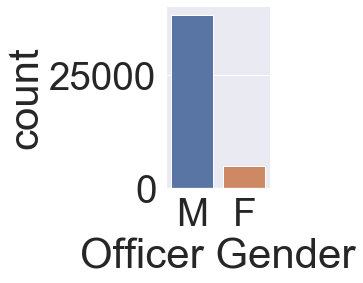

In [264]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Officer Gender', kind='count', data=df)


In [257]:
# Check Officer Track record, how often are they arresting 
# minorities?

#df.groupby(['Officer ID', 'Arrest Flag']).median().head()

In [258]:
# How often do police roll up without calls being made?

df.groupby(['Officer Race', 'Subject Perceived Race', 'Call Made']).median().head()

Officer YOB  \
Officer Race                  Subject Perceived Race           Call Made                
American Indian/Alaska Native American Indian or Alaska Native 0               1964.0   
                                                               1               1979.0   
                              Asian                            0               1978.0   
                                                               1               1978.0   
                              Black or African American        0               1978.0   

                                                                          Weapon  \
Officer Race                  Subject Perceived Race           Call Made           
American Indian/Alaska Native American Indian or Alaska Native 0             0.0   
                                                               1             0.0   
                              Asian                            0             0.0   
                                                               1             0.0   
                              Black or African American        0             0.0   

                                                                          Arrest Made  \
Officer Race                  Subject Perceived Race           Call Made                
American Indian/Alaska Native American Indian or Alaska Native 0                  0.0   
                                                               1                  0.0   
                              Asian                            0                  0.0   
                                                               1                  0.0   
                              Black or African American        0                  0.0   

                                                                          Frisk  \
Officer Race                  Subject Perceived Race           Call Made          
American Indian/Alaska Native American Indian or Alaska Native 0            0.0   
                                                               1            0.0   
                              Asian                            0            0.0   
                                                               1            1.0   
                              Black or African American        0            0.0   

                                                                          Year Reported  
Officer Race                  Subject Perceived Race           Call Made                 
American Indian/Alaska Native American Indian or Alaska Native 0                 2015.0  
                                                               1                 2015.0  
                              Asian                            0                 2016.0  
                                                               1                 2018.0  
                              Black or African American        0                 2016.0

In [259]:
df.groupby(['Subject Perceived Race', 'Frisk', 'Arrest Made']).median()

Officer YOB  \
Subject Perceived Race                    Frisk Arrest Made                
American Indian or Alaska Native          0     0                 1984.0   
                                                1                 1989.0   
                                          1     0                 1985.0   
                                                1                 1992.0   
Asian                                     0     0                 1985.0   
                                                1                 1988.0   
                                          1     0                 1984.0   
                                                1                 1990.0   
Black or African American                 0     0                 1985.0   
                                                1                 1989.0   
                                          1     0                 1984.0   
                                                1                 1988.0   
Hispanic                                  0     0                 1984.0   
                                          1     0                 1984.0   
Multi-Racial                              0     0                 1981.5   
                                          1     0                 1982.0   
Native Hawaiian or Other Pacific Islander 0     0                 1987.0   
                                                1                 1983.0   
                                          1     0                 1992.0   
                                                1                 1989.0   
Other                                     0     0                 1986.0   
                                                1                 1988.0   
                                          1     0                 1984.0   
                                                1                 1987.0   
Unknown                                   0     0                 1985.0   
                                                1                 1989.0   
                                          1     0                 1985.0   
                                                1                 1989.0   
White                                     0     0                 1984.0   
                                                1                 1989.0   
                                          1     0                 1984.0   
                                                1                 1987.0   

                                                             Weapon  \
Subject Perceived Race                    Frisk Arrest Made           
American Indian or Alaska Native          0     0               0.0   
                                                1               1.0   
                                          1     0               0.0   
                                                1               1.0   
Asian                                     0     0               0.0   
                                                1               1.0   
                                          1     0               0.0   
                                                1               1.0   
Black or African American                 0     0               0.0   
                                                1               1.0   
                                          1     0               0.0   
                                                1               1.0   
Hispanic                                  0     0               0.0   
                                          1     0               0.0   
Multi-Racial                              0     0               0.0   
                                          1     0               0.0   
Native Hawaiian or Other Pacific Islander 0     0               1.0   
                                                1               1.0   
                                          1     0       

In [260]:
eda_df = pd.read_csv('Terry_Cleaned_forEDA.csv')
eda_df.head()



,Unnamed: 0,Subject Age Group,Stop Resolution,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Beat,Weapon,Call Made,Arrest Made,Frisk,Year Reported
0,0,26 - 35,Arrest,7500,1984,M,Black or African American,Asian,Male,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,O2,0,0,0,0,2015
1,1,26 - 35,Field Contact,5670,1965,M,White,Other,Male,07:59:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015
2,2,26 - 35,Field Contact,4844,1961,M,White,White,Male,19:12:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015
3,3,26 - 35,Field Contact,7539,1963,M,White,Other,Male,04:55:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015
4,4,26 - 35,Field Contact,6973,1977,M,White,Black or African American,Male,00:41:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015


In [261]:
call_null = eda_df.loc[(eda_df['Call Type'] == '-')] # Find all Call Types listed as '-'
indices_todrop = call_null.index # Find the indices 
eda_df.drop(indices_todrop, axis=0, inplace=True) # Drop the rows by index

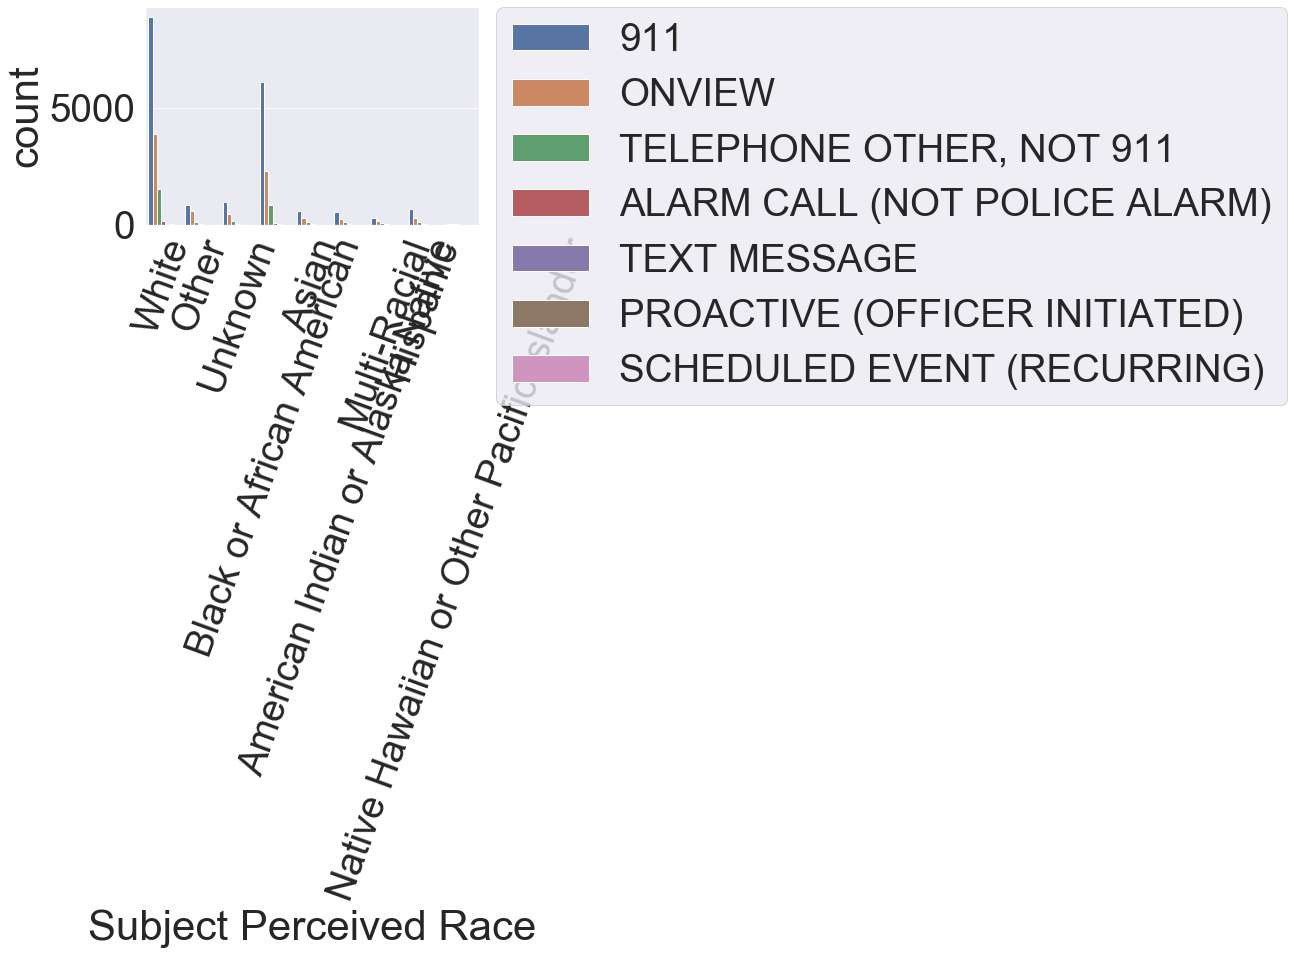

In [262]:
# Call Types by Subject Race
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=3.5)
sns.countplot(x='Subject Perceived Race', hue='Call Type', data=eda_df)

plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


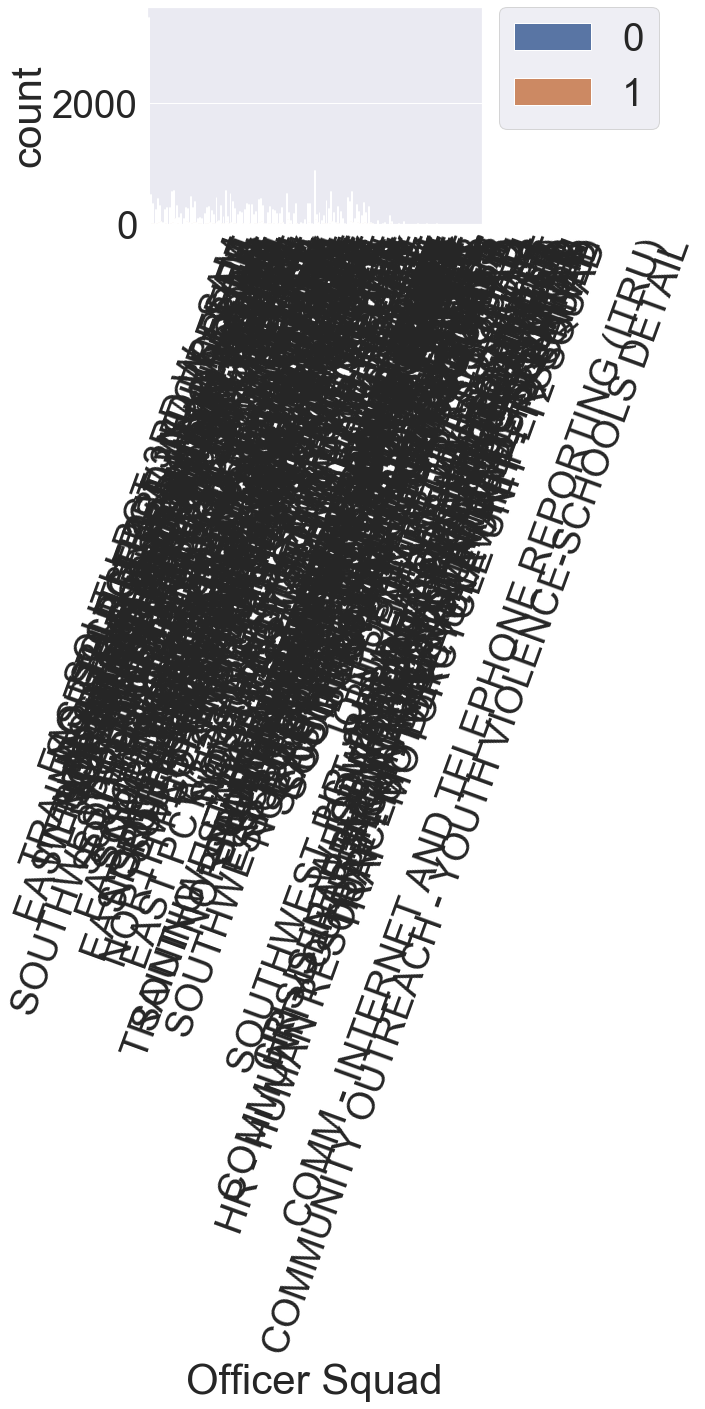

In [263]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=3.5)
sns.countplot(x='Officer Squad', hue='Arrest Made', data=eda_df)

plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

